## Ordinary Least Squares

### Simple Linear Model

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, ~~~~~ \epsilon_i \sim N(0, \sigma^2)$$

Simple Linear Model은 설명변수가 하나이고 종속변수가 하나인 단일 회귀 모형이다. 여기서 $\epsilon_i$는 오차인데, 오차는 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따른다고 가정한다

이 경우 추정해야 하는 Parameter는 bias로 해석되는 $\beta_0$과 회귀계수인 $\beta_1$, 오차항의 분산인 $\sigma^2$으로 총 3개이다

한편, 단순회귀모형을 Network Model로 표현할 경우 다음과 같이 표현 가능하다

<center>

![SimpleRegression.png](Images/SimpleRegression.png)

</center>

즉, 가중치가 $\beta_1$이고 bias가 $\beta_0$인 Linear Machine Learning Model과 같다

#### example 1

Statsmodel을 통해 단순회귀분석을 시행해 보자. 여기서 간단하게 실업률과 물가상승률의 관계를 살펴보도록 한다

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

START = '1999-01-01'
END = pd.to_datetime('today')

cpi = pdr.get_data_fred('CPIAUCSL', START, END) 
cpi.head()

,CPIAUCSL
DATE,
1999-01-01,164.7
1999-02-01,164.7
1999-03-01,164.8
1999-04-01,165.9
1999-05-01,166.0


In [50]:
inflation = cpi.pct_change(12).dropna()

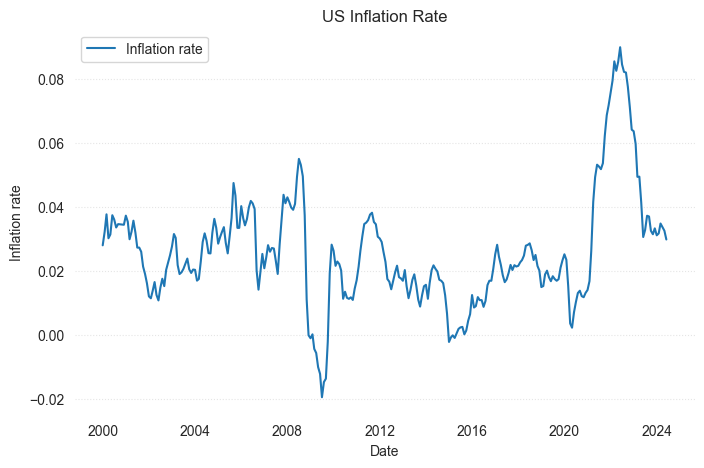

In [51]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(inflation, label = "Inflation rate")
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Inflation rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('US Inflation Rate')
plt.show()

In [54]:
unemployment = pdr.get_data_fred('UNRATE', '2000-01-01', END) * 0.01

In [55]:
unemployment.head()

,UNRATE
DATE,
2000-01-01,0.040
2000-02-01,0.041
2000-03-01,0.040
2000-04-01,0.038
2000-05-01,0.040


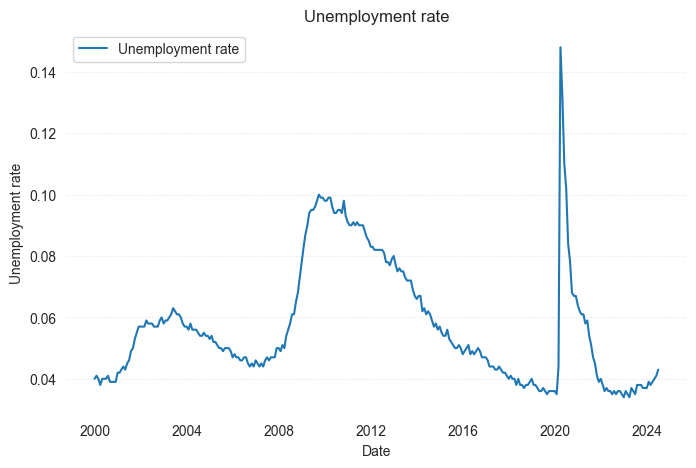

In [56]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(unemployment, label = "Unemployment rate")
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Unemployment rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Unemployment rate')
plt.show()

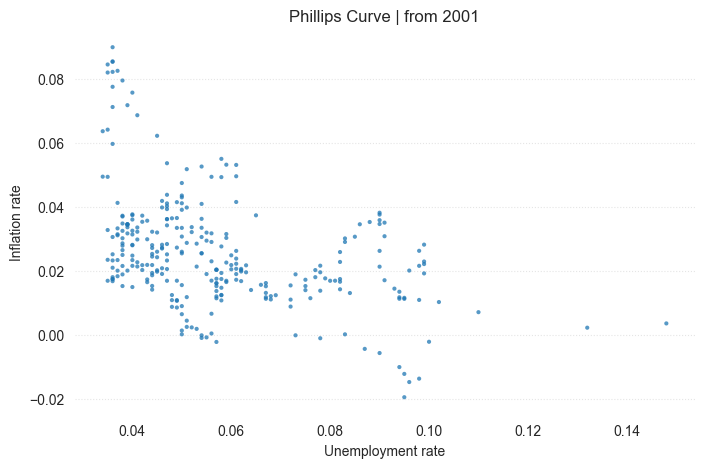

In [57]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    unemployment.loc[:'2024-06'], 
    inflation.loc[:'2024-06'],
    marker = '.',
    edgecolor = 'none',
    alpha = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('Inflation rate')
plt.xlabel('Unemployment rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Phillips Curve | from 2001')
plt.show()

단순회귀분석 $\mathrm{inflation}_i = \beta_0 + \beta_1 \mathrm{unemployment}_i + \epsilon_i$를 수행해 보자

In [58]:
matrix = pd.concat(
    [inflation, unemployment],
    axis = 1
).dropna()

In [59]:
import statsmodels.api as sm

X = matrix['CPIAUCSL']
X = sm.add_constant(X)
y = matrix['UNRATE']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.42e-15
Time:                        13:00:43   Log-Likelihood:                 769.29
No. Observations:                 294   AIC:                            -1535.
Df Residuals:                     292   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0697      0.002     38.286      0.0

$$\mathrm{inflation}_i = 0.0697 - 0.4839 \mathrm{unemployment}_i + \epsilon_i$$

$\beta_0 = 0.0697$, $\beta_1 = -0.4839$으로 추정되었다. 오차항에 대한 parameter는 아래와 같이 구할 수 있다

In [60]:
print(f'mean of error is {model.resid.mean() : .4f} and standard deviation of error is {model.resid.std() : .4f}')

mean of error is -0.0000 and standard deviation of error is  0.0177


/opt/anaconda3/envs/FinancialMachineLearning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/FinancialMachineLearning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


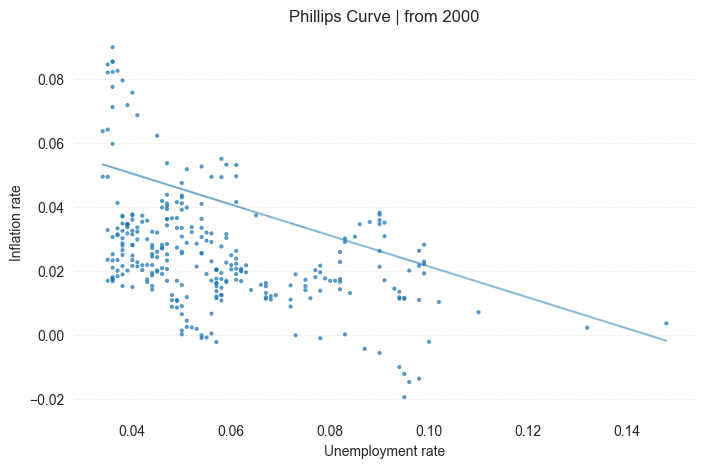

In [64]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    unemployment.loc[:'2024-06'], 
    inflation.loc[:'2024-06'],
    marker = '.',
    edgecolor = 'none',
    alpha = 0.75
)
sns.lineplot(
    x = matrix['UNRATE'], 
    y = 0.0697 + matrix['UNRATE'] * (-0.4839), 
    alpha = 0.5,
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('Inflation rate')
plt.xlabel('Unemployment rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Phillips Curve | from 2000')
plt.show()